# CSC321 Tutorial 3: Linear Classification

In this tutorial, we'll go through an example of linear classification. In addition,
there should be some time towards the end of the tutorial to talk about
project 1.

- set up the binary linear classification problem using numpy
- use the Iris flower dataset as a running example for classification
- explore the geometry of the problem

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The Iris Flower Dataset

The Iris flower dataset is another one of the "toy datasets" available in sklearn.

We will only work with the first 2 flower classes
(Setosa and Versicolour), and with just the first
two features: length and width of the sepal 

If you don't know what the sepal is, see this
diagram:
https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg

We can import and display the dataset description like this:

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
# print(iris['DESCR'])
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


To get some idea of what the data looks like, let's look at scatter plots across
each pair of features.

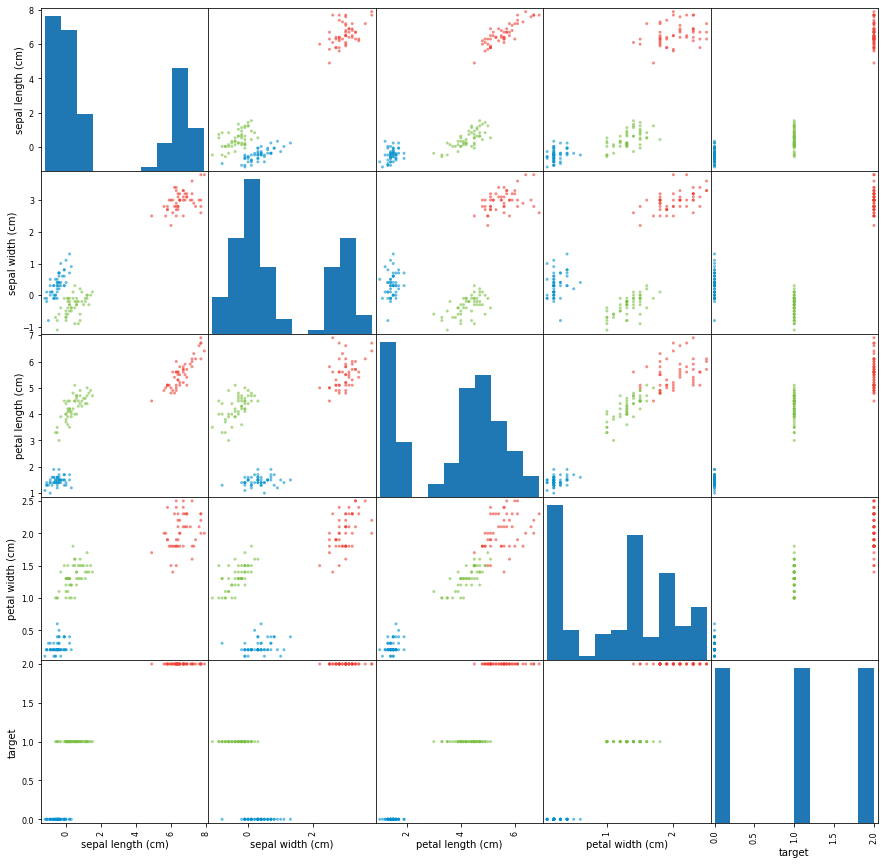

In [18]:
# code from
# http://stackoverflow.com/questions/21131707/multiple-data-in-scatter-matrix
# from pandas.tools.plotting import scatter_matrix # instead of
from pandas.plotting import scatter_matrix
import pandas as pd

iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']
color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = iris_data["target"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

In [20]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.371,0.401,1.4,0.2,0
1,-0.571,-0.099,1.4,0.2,0
2,-0.771,0.101,1.3,0.2,0
3,-0.871,0.001,1.5,0.2,0
4,-0.471,0.501,1.4,0.2,0


We'll only select the first two flower classes for binary classification (~100 rows),
and only use the first 2 features:

In [21]:
# Select first 2 flower classes (~100 rows)
# And first 2 features

sepal_len = iris['data'][:100,0]
sepal_wid = iris['data'][:100,1]
labels = iris['target'][:100]

We will also center the data. In this case, removing the mean means that
we won't need a bias in our model and still get reasonable results. Our binary
classification model will look like this:

\begin{align*}
z &= w_1 x_1 + w_2 x_2 \\
y &= \sigma(z)
\end{align*}

If $y >= 0.5$ then we will classify the flower as a Setosa.

In [11]:
sepal_len -= np.mean(sepal_len)
sepal_wid -= np.mean(sepal_wid)

Let's look at these two features. Note that in our case, the data set is *linearly separable*,
meaning that it is possible to draw a line that separates the two classes.

Text(0, 0.5, 'sepal width')

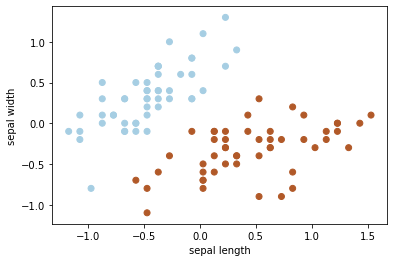

In [12]:
plt.scatter(sepal_len, 
            sepal_wid,
            c=labels,
            cmap=plt.cm.Paired)
plt.xlabel("sepal length")
plt.ylabel("sepal width")

## Decision Boundaries

We can show that $y = \sigma(z) >= 0.5$ if and only if $z >= 0$. Meaning that the
*decision boundary* $y = 0.5$ can be expressed as $w_1 x_1 + w_2 x_2 = 0$. The decision
boundary is therefore a line through the origin in the data space!

The following function will help us plot a decision boundary  $w_1 x_1 + w_2 x_2 = 0$.
(You're not required to know how this code works.)

In [22]:
def plot_sep(w1, w2, color='green'):
    '''
    Plot decision boundary hypothesis 
      w1 * sepal_len + w2 * sepal_wid = 0
    in input space, highlighting the hyperplane
    '''
    plt.scatter(sepal_len, 
                sepal_wid,
                c=labels,
                cmap=plt.cm.Paired)
    plt.title("Separation in Input Space")
    plt.ylim([-1.5,1.5])
    plt.xlim([-1.5,2])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    if w2 != 0:
        m = -w1/w2
        t = 1 if w2 > 0 else -1
        plt.plot(
            [-1.5,2.0], 
            [-1.5*m, 2.0*m], 
            '-y', 
            color=color)
        plt.fill_between(
            [-1.5, 2.0],
            [m*-1.5, m*2.0],
            [t*1.5, t*1.5],
            alpha=0.2,
            color=color)
    if w2 == 0: # decision boundary is vertical
        t = 1 if w1 > 0 else -1
        plt.plot([0, 0],
                 [-1.5, 2.0],
                 '-y',
                color=color)
        plt.fill_between(
            [0, 2.0*t],
            [-1.5, -2.0],
            [1.5, 2],
            alpha=0.2,
            color=color)

Let's look at a few example hypothesis to see how the choices of $w_1$ and $w_2$ influence the 
decision boundary:

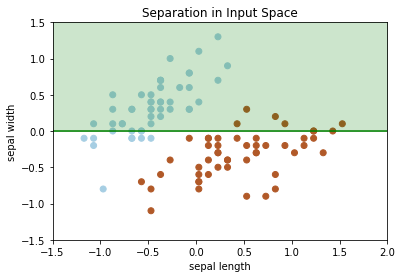

In [23]:
# Example hypothesis
#   sepal_wid = 0

plot_sep(0, 1)

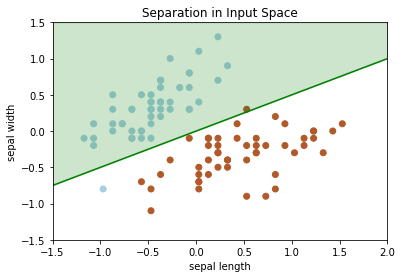

In [24]:
# Another example hypothesis:
#   -0.5*sepal_len + 1*sepal_wid >= 0

plot_sep(-0.5, 1)

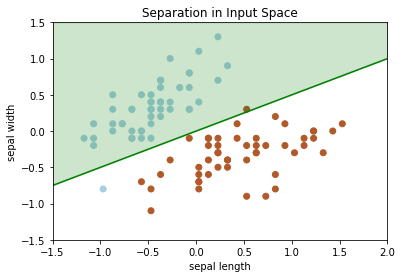

In [25]:
# Another example hypothesis:
#   -1.5*sepal_len + 3*sepal_wid >= 0

plot_sep(-1.5, 3)

The decision boundary of the last two hypotheses look identical! Note that there is a difference
between the two models. For a flower with (mean-adjusted) `sepal_length = 0` and `sepal_width = -0.5`,
the predictions for the two models are:

In [26]:
z1 = -0.5 * 0 + 1 * (-0.5)
y1 = 1 / (1 + np.exp(-z1))
print("Prediction for model 2: ", y1)

z2 = -1.5 * 0 + 3 * (-0.5)
y2 = 1 / (1 + np.exp(-z2))
print("Prediction for model 2: ", y2)

Prediction for model 2:  0.3775406687981454
Prediction for model 2:  0.18242552380635635


The second model will be more "certain" about its predictions.

## Using `sklearn`

In project 1, you'll be writing code to use gradient descent to
solve a linear classification problem. In practice, we use code
that is already written and tested for us.

In [27]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression(fit_intercept=False)
model.fit(np.stack([sepal_len, sepal_wid], axis=1),
          labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Here are the coefficients that we get from sklearn:

In [28]:
model.coef_

array([[ 3.02236435, -3.04229316]])

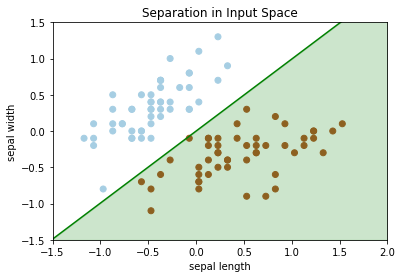

In [29]:
plot_sep(3.02235857, -3.04217535)